# জেনেটিক অ্যালগরিদম

এই নোটবুকটি [AI for Beginners Curriculum](http://github.com/microsoft/ai-for-beginners)-এর অংশ।


In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
import math
import time

## কিছু তত্ত্ব

**জেনেটিক অ্যালগরিদম** (GA) হলো AI-এর একটি **বিবর্তনমূলক পদ্ধতির** উপর ভিত্তি করে তৈরি, যেখানে জনসংখ্যার বিবর্তনের পদ্ধতি ব্যবহার করে একটি নির্দিষ্ট সমস্যার জন্য সর্বোত্তম সমাধান খুঁজে বের করা হয়। এটি ১৯৭৫ সালে [জন হেনরি হল্যান্ড](https://en.wikipedia.org/wiki/John_Henry_Holland) প্রস্তাব করেছিলেন।

জেনেটিক অ্যালগরিদম নিম্নলিখিত ধারণাগুলোর উপর ভিত্তি করে তৈরি:
* সমস্যার বৈধ সমাধানগুলোকে **জিন** হিসেবে উপস্থাপন করা যায়
* **ক্রসওভার** আমাদের দুটি সমাধান একত্রিত করে নতুন বৈধ সমাধান পেতে সাহায্য করে
* **সিলেকশন** ব্যবহার করে কিছু **ফিটনেস ফাংশন** এর মাধ্যমে আরও ভালো সমাধান নির্বাচন করা হয়
* **মিউটেশন** প্রবর্তন করা হয় যাতে অপ্টিমাইজেশনকে অস্থিতিশীল করা যায় এবং লোকাল মিনিমাম থেকে বেরিয়ে আসা যায়

যদি আপনি একটি জেনেটিক অ্যালগরিদম বাস্তবায়ন করতে চান, তাহলে আপনার প্রয়োজন হবে:

 * আমাদের সমস্যার সমাধানগুলোকে **জিন** $g\in\Gamma$ ব্যবহার করে কোডিং করার একটি পদ্ধতি খুঁজে বের করা
 * জিনের সেট $\Gamma$ এর উপর **ফিটনেস ফাংশন** $\mathrm{fit}: \Gamma\to\mathbb{R}$ সংজ্ঞায়িত করা। ছোট ফাংশন মানগুলো ভালো সমাধানের সাথে সম্পর্কিত হবে।
 * দুটি জিন একত্রিত করে নতুন বৈধ সমাধান পাওয়ার জন্য **ক্রসওভার** পদ্ধতি সংজ্ঞায়িত করা $\mathrm{crossover}: \Gamma^2\to\Gamma$।
 * **মিউটেশন** পদ্ধতি সংজ্ঞায়িত করা $\mathrm{mutate}: \Gamma\to\Gamma$।
অনেক ক্ষেত্রে, ক্রসওভার এবং মিউটেশন হলো জিনগুলোকে সংখ্যার ক্রম বা বিট ভেক্টর হিসেবে পরিচালনা করার সহজ অ্যালগরিদম।

জেনেটিক অ্যালগরিদমের নির্দিষ্ট বাস্তবায়ন ক্ষেত্রভেদে পরিবর্তিত হতে পারে, তবে সামগ্রিক কাঠামো নিম্নরূপ:

1. প্রাথমিক জনসংখ্যা নির্বাচন করুন $G\subset\Gamma$
2. এই ধাপে সম্পাদিত হওয়া অপারেশনটি এলোমেলোভাবে নির্বাচন করুন: ক্রসওভার বা মিউটেশন 
3. **ক্রসওভার**:
  * এলোমেলোভাবে দুটি জিন নির্বাচন করুন $g_1, g_2 \in G$
  * ক্রসওভার গণনা করুন $g=\mathrm{crossover}(g_1,g_2)$
  * যদি $\mathrm{fit}(g)<\mathrm{fit}(g_1)$ বা $\mathrm{fit}(g)<\mathrm{fit}(g_2)$ - জনসংখ্যায় সংশ্লিষ্ট জিনটি $g$ দ্বারা প্রতিস্থাপন করুন।
4. **মিউটেশন** - এলোমেলোভাবে একটি জিন নির্বাচন করুন $g\in G$ এবং এটি $\mathrm{mutate}(g)$ দ্বারা প্রতিস্থাপন করুন
5. ধাপ ২ থেকে পুনরাবৃত্তি করুন, যতক্ষণ না আমরা $\mathrm{fit}$ এর যথেষ্ট ছোট মান পাই, অথবা ধাপের সংখ্যার সীমা পৌঁছায়।

জেনেটিক অ্যালগরিদম দ্বারা সাধারণত সমাধান করা হয়:
1. সময়সূচি অপ্টিমাইজেশন
1. সর্বোত্তম প্যাকিং
1. সর্বোত্তম কাটিং
1. এক্সহস্টিভ সার্চ দ্রুততর করা


## সমস্যা ১: ন্যায্য ধনভাগ

**কাজ**:  
দুই ব্যক্তি একটি ধনসম্পদ খুঁজে পেয়েছে, যেখানে বিভিন্ন আকারের (এবং সেই অনুযায়ী, বিভিন্ন মূল্যের) হীরা রয়েছে। তাদের এই ধনসম্পদকে দুই ভাগে ভাগ করতে হবে, যাতে মূল্যের পার্থক্য ০ (বা সর্বনিম্ন) হয়।

**আনুষ্ঠানিক সংজ্ঞা**:  
আমাদের কাছে একটি সংখ্যা সেট $S$ রয়েছে। আমাদের সেটটিকে দুইটি উপসেট $S_1$ এবং $S_2$-এ ভাগ করতে হবে, যাতে $$\left|\sum_{i\in S_1}i - \sum_{j\in S_2}j\right|\to\min$$ এবং $S_1\cup S_2=S$, $S_1\cap S_2=\emptyset$ হয়।

প্রথমে, আসুন সেট $S$ সংজ্ঞায়িত করি:


In [3]:
N = 200
S = np.array([random.randint(1,10000) for _ in range(N)])
print(S)

[8344 2197 9335 3131 5863 9429 3818 9791   15 5455 1396 9538 4872 6549
 8587 5986 6021 9764 8102 5083 5739 7684 8498 3007 6599  820 7490 2372
 9370 5235 3525 3154  859 1906 8159 3950 2173 2988 2050  349 8713 2284
 4177 6033 1651 9176 5049 8201  171 5081 1216 3756 4711 2757 7738 1272
 5650 6584 5395 9004 7797  969 8104 1283 1392 4001 5768  445  274  256
 8239 8015 4381 9021 1189 8879 1411 3539 6526 8011  136 7230 2332  451
 5702 2989 4320 2446 9578 8486 4027 2410 9588 8981 2177 1493 3232 9151
 4835 5594 6859 8394  369 3200  126 4259 2283 7755 2014 2458 8327 8082
 7413 7622 1206 5533 8751 3495 5868 8472 6850 3958 3149 4672 4810 6274
 4700 6134 4627 4616 6656 9949  884 2256 7419 1926 7973 5319 5967 9158
 3823 7697 9466 5675 5412 9784 5426 8209 3421 1136 6047 4429 8001 4417
 1381  722 7350 6018 6235 7860 5853 7660 5937 6242    1 9552 3971 8302
 2633 9227 7283  154 8599 4269 9392 8539 1630  368 2409 9351 3838 9814
 6186 5743 5083 1325 1610  779 3643 3262 5768 8725  961 4611 6310 4788
 1648 

সমস্যার প্রতিটি সম্ভাব্য সমাধানকে একটি বাইনারি ভেক্টর $B\in\{0,1\}^N$ দ্বারা এনকোড করি, যেখানে $i$-তম অবস্থানে থাকা সংখ্যা দেখায় যে মূল সেট $S$-এর $i$-তম সংখ্যা কোন সেটে ($S_1$ বা $S_2$) অন্তর্ভুক্ত। `generate` ফাংশন সেই র্যান্ডম বাইনারি ভেক্টরগুলো তৈরি করবে।


In [5]:
def generate(S):
    return np.array([random.randint(0,1) for _ in S])

b = generate(S)
print(b)

[1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1
 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0
 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1
 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1
 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0
 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0]


এবার আসুন `fit` ফাংশনটি সংজ্ঞায়িত করি, যা সমাধানের "খরচ" গণনা করে। এটি হবে দুটি সেট, $S_1$ এবং $S_2$-এর যোগফলের মধ্যে পার্থক্য:


In [6]:
def fit(B,S=S):
    c1 = (B*S).sum()
    c2 = ((1-B)*S).sum()
    return abs(c1-c2)

fit(b)

133784

এখন আমাদের মিউটেশন এবং ক্রসওভারের জন্য ফাংশন সংজ্ঞায়িত করতে হবে:  
* মিউটেশনের জন্য, আমরা একটি র্যান্ডম বিট নির্বাচন করব এবং সেটি উল্টে দেব (০ থেকে ১ এবং ১ থেকে ০-এ পরিবর্তন করব)।  
* ক্রসওভারের জন্য, আমরা একটি ভেক্টর থেকে কিছু বিট নেব এবং অন্য ভেক্টর থেকে কিছু বিট নেব। আমরা একই `generate` ফাংশন ব্যবহার করব র্যান্ডমভাবে নির্বাচন করার জন্য, কোন বিটগুলো ইনপুট মাস্কগুলোর মধ্যে থেকে নেওয়া হবে।  


In [7]:
def mutate(b):
    x = b.copy()
    i = random.randint(0,len(b)-1)
    x[i] = 1-x[i]
    return x

def xover(b1,b2):
    x = generate(b1)
    return b1*x+b2*(1-x)

চলুন সমাধানগুলির প্রাথমিক জনসংখ্যা $P$ তৈরি করি যার আকার `pop_size`:


In [8]:
pop_size = 30
P = [generate(S) for _ in range(pop_size)]

এখন, বিবর্তন সম্পাদনের প্রধান ফাংশন। `n` হলো বিবর্তনের ধাপের সংখ্যা যা সম্পন্ন করতে হবে। প্রতিটি ধাপে:
* ৩০% সম্ভাবনায় আমরা একটি মিউটেশন সম্পাদন করি এবং সবচেয়ে খারাপ `fit` ফাংশনযুক্ত উপাদানকে মিউটেটেড উপাদান দিয়ে প্রতিস্থাপন করি
* ৭০% সম্ভাবনায় আমরা ক্রসওভার সম্পাদন করি

ফাংশনটি সেরা সমাধান (সেরা সমাধানের সাথে সম্পর্কিত জিন) এবং প্রতিটি পুনরাবৃত্তিতে জনসংখ্যার মধ্যে সর্বনিম্ন `fit` ফাংশনের ইতিহাস প্রদান করে।


In [9]:
def evolve(P,S=S,n=2000):
    res = []
    for _ in range(n):
        f = min([fit(b) for b in P])
        res.append(f)
        if f==0:
            break
        if random.randint(1,10)<3:
            i = random.randint(0,len(P)-1)
            b = mutate(P[i])
            i = np.argmax([fit(z) for z in P])
            P[i] = b
        else:
            i = random.randint(0,len(P)-1)
            j = random.randint(0,len(P)-1)
            b = xover(P[i],P[j])
            if fit(b)<fit(P[i]):
                P[i]=b
            elif fit(b)<fit(P[j]):
                P[j]=b
            else:
                pass
    i = np.argmin([fit(b) for b in P])
    return (P[i],res)

(s,hist) = evolve(P)
print(s,fit(s))

[0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0
 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0
 0 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1
 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0
 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1
 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1] 4


আপনি দেখতে পাচ্ছেন যে আমরা `fit` ফাংশনকে বেশ খানিকটা কমিয়ে আনতে সক্ষম হয়েছি! এখানে একটি গ্রাফ রয়েছে যা দেখায় যে পুরো জনসংখ্যার জন্য `fit` ফাংশন প্রক্রিয়ার সময় কীভাবে আচরণ করে।


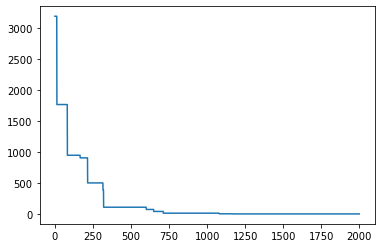

In [10]:
plt.plot(hist)
plt.show()

## সমস্যা ২: এন কুইন্স সমস্যা

**কাজ**:  
আপনাকে $N$ কুইন একটি $N\times N$ আকারের দাবার বোর্ডে এমনভাবে স্থাপন করতে হবে যাতে তারা একে অপরকে আক্রমণ না করে।

প্রথমে, জেনেটিক অ্যালগরিদম ব্যবহার না করে, পূর্ণ অনুসন্ধানের মাধ্যমে সমস্যাটি সমাধান করা যাক। আমরা বোর্ডের অবস্থাকে তালিকা $L$ দ্বারা উপস্থাপন করতে পারি, যেখানে তালিকার $i$-তম সংখ্যাটি $i$-তম সারিতে কুইনের অনুভূমিক অবস্থান নির্দেশ করে। এটি বেশ স্পষ্ট যে প্রতিটি সমাধানে প্রতিটি সারিতে শুধুমাত্র একটি কুইন থাকবে এবং প্রতিটি সারিতে একটি কুইন থাকবে।

আমাদের লক্ষ্য হবে সমস্যার প্রথম সমাধান খুঁজে বের করা, যার পরে আমরা অনুসন্ধান বন্ধ করব। আপনি সহজেই এই ফাংশনটি প্রসারিত করে কুইনের জন্য সমস্ত সম্ভাব্য অবস্থান তৈরি করতে পারেন।


In [11]:
N = 8

def checkbeats(i_new,j_new,l):
    for i,j in enumerate(l,start=1):
        if j==j_new:
            return False
        else:
            if abs(j-j_new) == i_new-i:
                return False
    return True

def nqueens(l,N=8,disp=True):
    if len(l)==N:
        if disp: print(l)
        return True
    else:
        for j in range(1,N+1):
            if checkbeats(len(l)+1,j,l):
                l.append(j)
                if nqueens(l,N,disp): return True
                else: l.pop()
        return False
            
nqueens([],8)


[1, 5, 8, 6, 3, 7, 2, 4]


True

এখন চলুন মাপা যাক ২০-কুইন সমস্যা সমাধান করতে কতক্ষণ সময় লাগে:


In [12]:
%timeit nqueens([],20,False)

10.6 s ± 2.17 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


এখন আমরা একই সমস্যাটি জেনেটিক অ্যালগরিদম ব্যবহার করে সমাধান করব। এই সমাধানটি [এই ব্লগ পোস্ট](https://kushalvyas.github.io/gen_8Q.html) থেকে অনুপ্রাণিত।

আমরা প্রতিটি সমাধানকে $N$ দৈর্ঘ্যের একই তালিকা দ্বারা উপস্থাপন করব, এবং `fit` ফাংশন হিসেবে আমরা এমন কুইনগুলোর সংখ্যা গ্রহণ করব যারা একে অপরকে আক্রমণ করে:


In [13]:
def fit(L):
    x=0
    for i1,j1 in enumerate(L,1):
        for i2,j2 in enumerate(L,1):
            if i2>i1:
                if j2==j1 or (abs(j2-j1)==i2-i1): x+=1
    return x

যেহেতু ফিটনেস ফাংশন গণনা করা সময়সাপেক্ষ, চলুন জনসংখ্যার প্রতিটি সমাধানকে ফিটনেস ফাংশনের মান সহ সংরক্ষণ করি। চলুন প্রাথমিক জনসংখ্যা তৈরি করি:


In [14]:
def generate_one(N):
    x = np.arange(1,N+1)
    np.random.shuffle(x)
    return (x,fit(x))

def generate(N,NP):
    return [generate_one(N) for _ in range(NP)]

generate(8,5)

[(array([2, 3, 8, 7, 5, 4, 1, 6]), 4),
 (array([3, 4, 5, 1, 2, 8, 6, 7]), 8),
 (array([1, 3, 7, 4, 5, 8, 6, 2]), 6),
 (array([1, 5, 4, 6, 8, 3, 7, 2]), 4),
 (array([3, 5, 7, 1, 8, 6, 4, 2]), 3)]

এখন আমাদের মিউটেশন এবং ক্রসওভার ফাংশন সংজ্ঞায়িত করতে হবে। ক্রসওভার দুটি জিনকে একসাথে সংযুক্ত করবে, যেকোনো একটি র্যান্ডম পয়েন্টে ভেঙে এবং বিভিন্ন জিনের দুটি অংশ একত্রিত করে।


In [15]:
def mutate(G):
    x=random.randint(0,len(G)-1)
    G[x]=random.randint(1,len(G))
    return G
    
def xover(G1,G2):
    x=random.randint(0,len(G1))
    return np.concatenate((G1[:x],G2[x:]))

xover([1,2,3,4],[5,6,7,8])

array([1, 2, 7, 8])

In [17]:
def choose_rand(P):
    N=len(P[0][0])
    mf = N*(N-1)//2 # max fitness fn
    z = [mf-x[1] for x in P]
    tf = sum(z) # total fitness
    w = [x/tf for x in z]
    p = np.random.choice(len(P),2,False,p=w)
    return p[0],p[1]

def choose(P):
    def ch(w):
        p=[]
        while p==[]:
            r = random.random()
            p = [i for i,x in enumerate(P) if x[1]>=r]
        return random.choice(p)
    N=len(P[0][0])
    mf = N*(N-1)//2 # max fitness fn
    z = [mf-x[1] for x in P]
    tf = sum(z) # total fitness
    w = [x/tf for x in z]
    p1=p2=0
    while p1==p2:
        p1 = ch(w)
        p2 = ch(w)
    return p1,p2

এখন আমরা প্রধান বিবর্তনমূলক লুপটি সংজ্ঞায়িত করব। আমরা লজিকটি আগের উদাহরণের থেকে একটু ভিন্ন করব, যাতে বোঝানো যায় যে সৃজনশীল হওয়া সম্ভব। আমরা লুপ চালাব যতক্ষণ না আমরা নিখুঁত সমাধান পাই (fitness function=0), এবং প্রতিটি ধাপে আমরা বর্তমান প্রজন্ম নেব এবং একই আকারের নতুন প্রজন্ম তৈরি করব। এটি `nxgeneration` ফাংশন ব্যবহার করে করা হয়, নিম্নলিখিত ধাপগুলো অনুসরণ করে:

1. সবচেয়ে অযোগ্য সমাধানগুলো বাদ দিন - এটি করার জন্য `discard_unfit` ফাংশন রয়েছে
1. প্রজন্মে আরও কিছু র্যান্ডম সমাধান যোগ করুন
1. প্রতিটি নতুন জিনের জন্য নিম্নলিখিত ধাপগুলো ব্যবহার করে আকার `gen_size` এর একটি নতুন প্রজন্ম তৈরি করুন:
    - দুটি র্যান্ডম জিন নির্বাচন করুন, fitness function এর আনুপাতিক সম্ভাবনা অনুযায়ী
    - একটি ক্রসওভার গণনা করুন
    - `mutation_prob` সম্ভাবনা সহ একটি মিউটেশন প্রয়োগ করুন


In [20]:
mutation_prob = 0.1

def discard_unfit(P):
    P.sort(key=lambda x:x[1])
    return P[:len(P)//3]

def nxgeneration(P):
    gen_size=len(P)
    P = discard_unfit(P)
    P.extend(generate(len(P[0][0]),3))
    new_gen = []
    for _ in range(gen_size):
        p1,p2 = choose_rand(P)
        n = xover(P[p1][0],P[p2][0])
        if random.random()<mutation_prob:
            n=mutate(n)
        nf = fit(n)
        new_gen.append((n,nf))
        '''
        if (nf<=P[p1][1]) or (nf<=P[p2][1]):
            new_gen.append((n,nf))
        elif (P[p1][1]<P[p2][1]):
            new_gen.append(P[p1])
        else:
            new_gen.append(P[p2])
        '''
    return new_gen
    
def genetic(N,pop_size=100):
    P = generate(N,pop_size)
    mf = min([x[1] for x in P])
    n=0
    while mf>0:
        #print("Generation {0}, fit={1}".format(n,mf))
        n+=1
        mf = min([x[1] for x in P])
        P = nxgeneration(P)
    mi = np.argmin([x[1] for x in P])
    return P[mi]

genetic(8)

(array([4, 7, 5, 3, 1, 6, 8, 2]), 0)

এটি আকর্ষণীয় যে বেশিরভাগ সময় আমরা খুব দ্রুত একটি সমাধান পেতে সক্ষম হই, কিন্তু কিছু বিরল ক্ষেত্রে অপ্টিমাইজেশন স্থানীয় ন্যূনতমে পৌঁছে যায়, এবং প্রক্রিয়াটি দীর্ঘ সময়ের জন্য আটকে থাকে। গড় সময় পরিমাপ করার সময় এটি বিবেচনায় নেওয়া গুরুত্বপূর্ণ: যদিও বেশিরভাগ ক্ষেত্রে জেনেটিক অ্যালগরিদম সম্পূর্ণ অনুসন্ধানের চেয়ে দ্রুত হয়, কিছু ক্ষেত্রে এটি বেশি সময় নিতে পারে। এই সমস্যাটি অতিক্রম করার জন্য, প্রায়শই প্রজন্মের সংখ্যা সীমাবদ্ধ করা যৌক্তিক হয়, এবং যদি আমরা সমাধান খুঁজে পেতে ব্যর্থ হই - আমরা নতুন করে শুরু করতে পারি।


In [19]:
%timeit genetic(10)

The slowest run took 18.71 times longer than the fastest. This could mean that an intermediate result is being cached.
26.4 s ± 28.7 s per loop (mean ± std. dev. of 7 runs, 1 loop each)



---

**অস্বীকৃতি**:  
এই নথিটি AI অনুবাদ পরিষেবা [Co-op Translator](https://github.com/Azure/co-op-translator) ব্যবহার করে অনুবাদ করা হয়েছে। আমরা যথাসম্ভব সঠিক অনুবাদের চেষ্টা করি, তবে অনুগ্রহ করে মনে রাখবেন যে স্বয়ংক্রিয় অনুবাদে ত্রুটি বা অসঙ্গতি থাকতে পারে। নথিটির মূল ভাষায় লেখা সংস্করণটিকেই প্রামাণিক উৎস হিসেবে বিবেচনা করা উচিত। গুরুত্বপূর্ণ তথ্যের জন্য, পেশাদার মানব অনুবাদ ব্যবহার করার পরামর্শ দেওয়া হচ্ছে। এই অনুবাদ ব্যবহারের ফলে সৃষ্ট কোনো ভুল বোঝাবুঝি বা ভুল ব্যাখ্যার জন্য আমরা দায়ী নই।  
